In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

from inventory import inventory

In [2]:
T = 50

X0 = np.array([0,10])

U = np.ones((T))*4

Y0 = np.array([1,1,2,2,7,10,8])

gamma = 0.5
beta  = 1.0
alpha = 2.0

sigma = 0.8
c     = 0.5
m     = 7

In [3]:
A = np.array([
    [1,0],
    [-gamma,1]
])

B = np.array([1,-beta])

C = np.array([-1, alpha])

In [4]:
forecaster = inventory.Forecaster(c,m,sigma)

X,Y,S = inventory.sim(X0, Y0, U, A, B, C, T, forecaster)

In [5]:
Ntrials = 1000
Trhc    = 10
Umax    = 20

Urhc      = np.zeros((T))
Xrhc      = np.zeros((2,T))
Xrhc[:,0] = X0
Yrhc      = np.zeros((T+m))
Yrhc[:m]  = Y0

Srhc      = np.zeros((T))

for i in range(T-1):
    Ubest = 0
    Xbest = 0
    Ybest = 0
    Sbest = 0

    best_rev = -1e6
    
    X0 = Xrhc[:,i]
    Y0 = Yrhc[i:i+m]
    
    for j in range(Ntrials):
        Utrial = np.random.randint(Umax, size=Trhc)
        X_,Y_,S_ = inventory.sim(X0, Y0, Utrial, A, B, C, Trhc, forecaster)
    
        if X_[1,-1] > best_rev:
            Ubest = Utrial
            Xbest = X_
            Ybest = Y_
            Sbest = S_
            best_rev = X_[1,-1]

    Urhc[i]       = Ubest[0]      
    Xrhc[:,i+1]   = Xbest[:,1]
    Yrhc[i+m+1]   = Ybest[0]
    Srhc[i+1]     = Sbest[0]

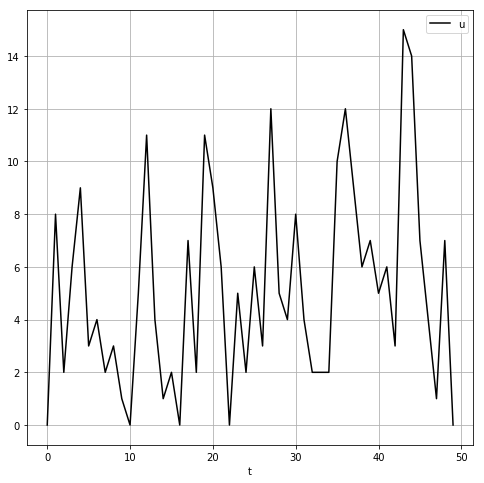

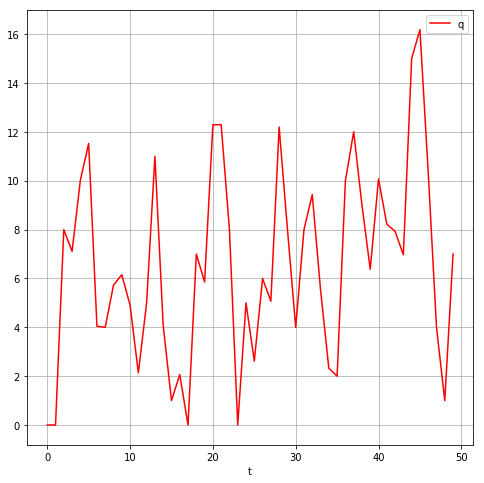

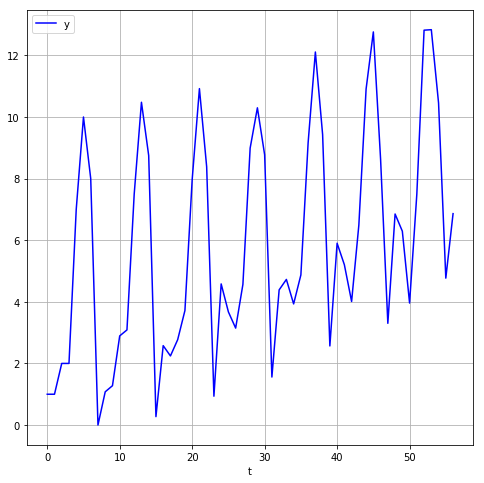

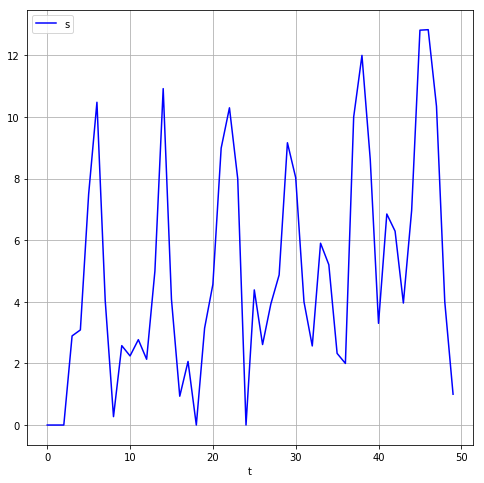

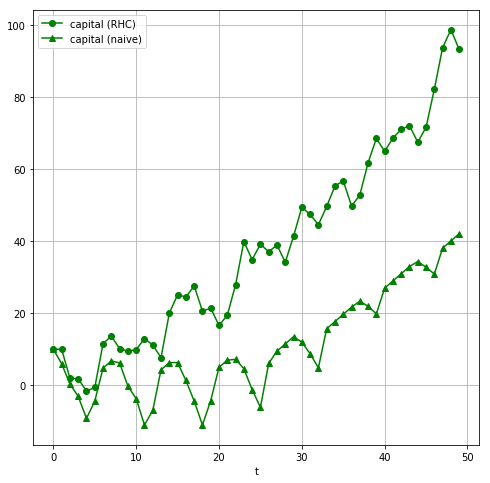

In [6]:
plt.figure(figsize=(8,8))
plt.plot(Urhc, color='k', label='u')
plt.legend()
plt.xlabel('t')
plt.grid(True)
plt.savefig('inventory_control.png', dpi=300)
plt.show()

plt.figure(figsize=(8,8))
plt.plot(Xrhc[0,:], color='r', label='q')
plt.legend()
plt.xlabel('t')
plt.grid(True)
plt.savefig('inventory_inventory.png', dpi=300)
plt.show()

plt.figure(figsize=(8,8))
plt.plot(Yrhc, color='b', label='y')
plt.legend()
plt.xlabel('t')
plt.grid(True)
plt.savefig('inventory_demand.png', dpi=300)
plt.show()

plt.figure(figsize=(8,8))
plt.plot(Srhc, color='b', label='s')
plt.legend()
plt.xlabel('t')
plt.grid(True)
plt.savefig('inventory_sales.png', dpi=300)
plt.show()

plt.figure(figsize=(8,8))
plt.plot(Xrhc[1,:], color='g', marker = 'o', label='capital (RHC)')
plt.plot(X[1,:], color='g', marker = '^', label='capital (naive)')
plt.legend()
plt.xlabel('t')
plt.grid(True)
plt.savefig('inventory_capital.png', dpi=300)
plt.show()